# This code extracts the information we will need from each drug

## Importing packages

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Downloading the data from CPIC

In [2]:
cpic_drug_url = "https://api.cpicpgx.org/v1/drug"
cpic_recommendations_url = "https://api.cpicpgx.org/v1/recommendation"
cpic_test_alert_url = "https://api.cpicpgx.org/v1/test_alert"

# Fetch data from cpic_drug_url
response_drug = requests.get(cpic_drug_url)
if response_drug.status_code == 200:
    cpic_drug_data = response_drug.json()
else:
    print("Error retrieving data from cpic_drug_url.")

# Fetch data from cpic_recommendations_url
response_recommendations = requests.get(cpic_recommendations_url)
if response_recommendations.status_code == 200:
    cpic_recommendations_data = response_recommendations.json()
else:
    print("Error retrieving data from cpic_recommendations_url.")

# Fetch data from cpic_test_alert_url
response_test_alert = requests.get(cpic_test_alert_url)
if response_test_alert.status_code == 200:
    cpic_test_alert_data = response_test_alert.json()
else:
    print("Error retrieving data from cpic_test_alert_url.")

In [3]:
def fetch_cpic_drug():

    response = requests.get(cpic_drug_url)
    data = response.json()

    return data

def fetch_cpic_recommendations():

    response = requests.get(cpic_recommendations_url)
    data = response.json()

    return data

def fetch_cpic_test_alert():

    response = requests.get(cpic_test_alert_url)
    data = response.json()

    return data

In [4]:
drugs = fetch_cpic_drug()
recommendations = fetch_cpic_recommendations()
test_alert = fetch_cpic_test_alert()

## Saving the data as Data frames

In [5]:
df_drugs = pd.DataFrame(drugs)
df_recommendations = pd.DataFrame(recommendations)
df_test_alert = pd.DataFrame(test_alert)

## Look at the data frames

### Drugs

In [6]:
df_drugs.head(10)

,drugid,name,pharmgkbid,rxnormid,drugbankid,atcid,umlscui,flowchart,version,guidelineid
0,RxNorm:401713,carglumic acid,PA165958402,401713,DB06775,[A16AA05],None,None,65,NaN
1,RxNorm:42347,bupropion,PA448687,42347,DB01156,[N06AX12],None,None,65,NaN
2,RxNorm:1886,caffeine,PA448710,1886,DB00201,[N06BC01],None,None,65,NaN
3,RxNorm:266856,divalproex sodium,PA164783479,266856,DB00510,None,None,None,65,NaN
4,RxNorm:3355,diclofenac,PA449293,3355,DB00586,"[D11AX18, M01AB05, M02AA15, S01BC03]",None,None,173,110058.0
5,RxNorm:596723,cerivastatin,PA448897,596723,DB00439,[C10AA06],None,None,65,NaN
6,RxNorm:2555,cisplatin,PA449014,2555,DB00515,[L01XA01],None,None,65,NaN
7,RxNorm:10627,tobramycin,PA451704,10627,DB00684,"[J01GB01, S01AA12]",None,None,108,826283.0
8,RxNorm:83367,atorvastatin,PA448500,83367,DB01076,[C10AA05],None,https://files.cpicpgx.org/images/flow_chart/At...,141,100426.0
9,ATC:L01A,Alkylating Agents,PA164712331,None,None,[L01A],None,None,65,NaN


In [7]:
df_drugs.shape

(316, 10)

In [8]:
drugs_new = df_drugs[['drugid', 'name']]
# drugid = A unique identifier for this drug in the form “source:id” where source is some outside knowledge resource and id is their identifier, primary key
# name = The generic name for this drug, lower-cased, required

### Recommendations:

In [9]:
df_recommendations.head(10)

,id,guidelineid,drugid,implications,drugrecommendation,classification,phenotypes,activityscore,allelestatus,lookupkey,population,comments,version,dosinginformation,alternatedrugavailable,otherprescribingguidance
0,3369605,100421,RxNorm:190521,{'HLA-B': 'Low or reduced risk of abacavir hyp...,Use abacavir per standard dosing guidelines,Strong,{},{},{'HLA-B': 'HLA-B*57:01 negative'},{'HLA-B': '*57:01 negative'},general,n/a,1,False,False,False
1,3369606,100421,RxNorm:190521,{'HLA-B': 'Significantly increased risk of aba...,Abacavir is not recommended,Strong,{},{},{'HLA-B': 'HLA-B*57:01 positive'},{'HLA-B': '*57:01 positive'},general,n/a,1,False,False,False
2,3369607,100422,RxNorm:519,{'HLA-B': 'Low or reduced risk of allopurinol-...,Use allopurinol per standard dosing guidelines,Strong,{},{},{'HLA-B': 'HLA-B*58:01 negative'},{'HLA-B': '*58:01 negative'},general,n/a,1,False,False,False
3,3369608,100422,RxNorm:519,{'HLA-B': 'Significantly increased risk of all...,Allopurinol is contraindicated,Strong,{},{},{'HLA-B': 'HLA-B*58:01 positive'},{'HLA-B': '*58:01 positive'},general,n/a,1,False,False,False
4,3369609,826283,RxNorm:641,{'MT-RNR1': 'Very high risk of developing hear...,Avoid aminoglycoside anitbiotics unless the hi...,Strong,{'MT-RNR1': 'increased risk of aminoglycoside-...,{},{},{'MT-RNR1': 'increased risk of aminoglycoside-...,general,If no effective alternative to an aminoglycosi...,1,False,False,False
5,3369610,826283,RxNorm:641,{'MT-RNR1': 'Normal risk of developing hearing...,Use aminoglycoside antibiotics at standard dos...,Strong,{'MT-RNR1': 'normal risk of aminoglycoside-ind...,{},{},{'MT-RNR1': 'normal risk of aminoglycoside-ind...,general,Individuals without MT-RNR1 aminoglycoside-ind...,1,False,False,False
6,3369611,826283,RxNorm:641,{'MT-RNR1': 'Weak or no evidence for an increa...,Use aminoglycoside antibiotics at standard dos...,Optional,{'MT-RNR1': 'uncertain risk of aminoglycoside-...,{},{},{'MT-RNR1': 'uncertain risk of aminoglycoside-...,general,Individuals without MT-RNR1 aminoglycoside-ind...,1,False,False,False
7,3369612,826283,ATC:D06AX07,{'MT-RNR1': 'Very high risk of developing hear...,Avoid aminoglycoside anitbiotics unless the hi...,Strong,{'MT-RNR1': 'increased risk of aminoglycoside-...,{},{},{'MT-RNR1': 'increased risk of aminoglycoside-...,general,If no effective alternative to an aminoglycosi...,1,False,False,False
8,3369613,826283,ATC:D06AX07,{'MT-RNR1': 'Normal risk of developing hearing...,Use aminoglycoside antibiotics at standard dos...,Strong,{'MT-RNR1': 'normal risk of aminoglycoside-ind...,{},{},{'MT-RNR1': 'normal risk of aminoglycoside-ind...,general,Individuals without MT-RNR1 aminoglycoside-ind...,1,False,False,False
9,3369614,826283,ATC:D06AX07,{'MT-RNR1': 'Weak or no evidence for an increa...,Use aminoglycoside antibiotics at standard dos...,Optional,{'MT-RNR1': 'uncertain risk of aminoglycoside-...,{},{},{'MT-RNR1': 'uncertain risk of aminoglycoside-...,general,Individuals without MT-RNR1 aminoglycoside-ind...,1,False,False,False


In [10]:
df_recommendations.shape

(2098, 16)

In [11]:
recommendations_new = df_recommendations[['drugid', 'implications', 'drugrecommendation', 'classification', 'phenotypes', 'activityscore', 'allelestatus', 'lookupkey', 'comments']]
# drugid = The drug this recommendation is for
# implications = Implications for phenotypic measures, this is a JSON mapping of gene to implication
# drugrecommendation = Dosing or therapeutic recommendations, depending on particular drug
# classification = Classification of recommendations, described in supplementary meterial
# phenotypes = Phenotypes that this recommendation applies to, this is a JSON mapping of gene to phenotype
# activityscore = Activity score that this recommendation applies to, this is a JSON mapping of gene to score value
# allelestatus = Whether or not an allele is present, used mainly for HLA genes, and used for recommendation lookups. This is a JSON mapping of gene to allele status (positive/negative)
# lookupkey = A key to use for finding a specific recommendation. Made of a JSON object of gene symbol to key value. The key value can be one of phenotype, activity score, or allele status depending on the gene.
# comments = Optional comments about the recommendation

In [12]:
df_recommendations['dosinginformation'].value_counts()

dosinginformation
False    2098
Name: count, dtype: int64

In [13]:
df_recommendations['drugrecommendation'].value_counts().head(2)

drugrecommendation
Initiate therapy with recommended starting dose.    172
No recommendation                                   112
Name: count, dtype: int64

### Test alert

In [14]:
df_test_alert.head(10)

,id,population,cdscontext,genes,phenotype,activityscore,allelestatus,lookupkey,drugid,alerttext,version
0,3371703,general,Post-test,"[CYP2D6, CYP2C19]","{'CYP2D6': 'Poor Metabolizer', 'CYP2C19': 'No ...","{'CYP2D6': '0.0', 'CYP2C19': 'No result on file'}",{},"{'CYP2D6': '0.0', 'CYP2C19': 'No Result'}",RxNorm:704,[CYP2D6 and CYP2C19 genetic status may be pred...,1
1,3371704,general,Post-test,"[CYP2D6, CYP2C19]","{'CYP2D6': 'Intermediate Metabolizer', 'CYP2C1...","{'CYP2D6': '0.25', 'CYP2C19': 'No result on fi...",{},"{'CYP2D6': '0.25', 'CYP2C19': 'No Result'}",RxNorm:704,[CYP2D6 and CYP2C19 genetic status may be pred...,1
2,3371705,general,Post-test,"[CYP2D6, CYP2C19]","{'CYP2D6': 'Intermediate Metabolizer', 'CYP2C1...","{'CYP2D6': '0.5', 'CYP2C19': 'No result on file'}",{},"{'CYP2D6': '0.5', 'CYP2C19': 'No Result'}",RxNorm:704,[CYP2D6 and CYP2C19 genetic status may be pred...,1
3,3371706,general,Post-test,"[CYP2D6, CYP2C19]","{'CYP2D6': 'Intermediate Metabolizer', 'CYP2C1...","{'CYP2D6': '0.75', 'CYP2C19': 'No result on fi...",{},"{'CYP2D6': '0.75', 'CYP2C19': 'No Result'}",RxNorm:704,[CYP2D6 and CYP2C19 genetic status may be pred...,1
4,3371707,general,Post-test,"[CYP2D6, CYP2C19]","{'CYP2D6': 'Intermediate Metabolizer', 'CYP2C1...","{'CYP2D6': '1.0', 'CYP2C19': 'No result on file'}",{},"{'CYP2D6': '1.0', 'CYP2C19': 'No Result'}",RxNorm:704,[CYP2D6 and CYP2C19 genetic status may be pred...,1
5,3371708,general,Post-test,"[CYP2D6, CYP2C19]","{'CYP2D6': 'Normal Metabolizer', 'CYP2C19': 'N...","{'CYP2D6': '1.25', 'CYP2C19': 'No result on fi...",{},"{'CYP2D6': '1.25', 'CYP2C19': 'No Result'}",RxNorm:704,[CYP2D6 and CYP2C19 genetic status may be pred...,1
6,3371709,general,Post-test,"[CYP2D6, CYP2C19]","{'CYP2D6': 'Normal Metabolizer', 'CYP2C19': 'N...","{'CYP2D6': '1.5', 'CYP2C19': 'No result on file'}",{},"{'CYP2D6': '1.5', 'CYP2C19': 'No Result'}",RxNorm:704,[CYP2D6 and CYP2C19 genetic status may be pred...,1
7,3371710,general,Post-test,"[CYP2D6, CYP2C19]","{'CYP2D6': 'Normal Metabolizer', 'CYP2C19': 'N...","{'CYP2D6': '1.75', 'CYP2C19': 'No result on fi...",{},"{'CYP2D6': '1.75', 'CYP2C19': 'No Result'}",RxNorm:704,[CYP2D6 and CYP2C19 genetic status may be pred...,1
8,3371711,general,Post-test,"[CYP2D6, CYP2C19]","{'CYP2D6': 'Normal Metabolizer', 'CYP2C19': 'N...","{'CYP2D6': '2.0', 'CYP2C19': 'No result on file'}",{},"{'CYP2D6': '2.0', 'CYP2C19': 'No Result'}",RxNorm:704,[CYP2D6 and CYP2C19 genetic status may be pred...,1
9,3372747,non-H.pylori_erosive eso,No CDS,[CYP2C19],{'CYP2C19': 'Normal Metabolizer'},{'CYP2C19': 'n/a'},{},{'CYP2C19': 'Normal Metabolizer'},RxNorm:17128,[n/a],1


In [15]:
test_alert_new = df_test_alert[['drugid', 'genes', 'phenotype', 'activityscore', 'allelestatus', 'lookupkey', 'alerttext']]
# drugid = The ID of a drug this alert text is for
# genes = One or more genes this test alert uses for trigger conditions
# phenotype = A JSON object of gene symbol keys to phenotype description
# activityscore = A JSON object of gene symbol keys to gene activity score
# allelestatus = Whether or not an allele is present, used mainly for HLA genes. This is a JSON mapping of gene to allele status (positive/negative)
# lookupkey = A key to use for finding a specific test alert. Made of a JSON object of gene symbol to key value. The key value can be one of phenotype, activity score, or allele status depending on the gene.
# alerttext = An array of one or more pieces of alert text

In [16]:
df_test_alert['genes'].value_counts()

genes
[CYP2D6, CYP2C19]    1035
[CYP2D6]              321
[G6PD]                198
[CYP2C19]             117
[TPMT, NUDT15]        108
[CYP2B6, CYP2C19]      63
[CYP2C9]               49
[CYP2C9, SLCO1B1]      49
[MT-RNR1]              44
[RYR1, CACNA1S]        42
[CYP2C9, HLA-B]        42
[SLCO1B1]              35
[SLCO1B1, ABCG2]       28
[DPYD]                 12
[HLA-B, HLA-A]          9
[HLA-B]                 9
[CYP2B6]                7
[CYP3A5]                6
[UGT1A1]                5
Name: count, dtype: int64

In [17]:
df_test_alert['alerttext'][10]

['n/a']

In [18]:
df_test_alert['alerttext'] = df_test_alert['alerttext'].replace('n/a', 'consult a clinical doctor')
df_test_alert['alerttext'][100]

['CYP2D6 and CYP2C19 genetic status may be predictive of an adverse reaction or poor response to this medication due to altered drug metabolism. This patient is predicted to be a CYP2D6 intermediate metabolizer and a CYP2C19 ultrarapid metabolizer. The patient may be at an increased risk of a sub-optimal response. Consider selecting an alternative drug. If amitriptyline is warranted utilize therapeutic drug monitoring to guide dose adjustments. Please consult a clinical pharmacist for more information.']

## Creating 1 dataframe with everything we will need.

In [19]:
merge1 = pd.merge(drugs_new, recommendations_new, left_on = 'drugid', right_on = 'drugid', how = 'inner')
merge2 = pd.merge(merge1, test_alert_new, left_on = 'drugid', right_on = 'drugid', how = 'inner')
merge2

,drugid,name,implications,drugrecommendation,classification,phenotypes,activityscore_x,allelestatus_x,lookupkey_x,comments,genes,phenotype,activityscore_y,allelestatus_y,lookupkey_y,alerttext
0,RxNorm:10627,tobramycin,{'MT-RNR1': 'Very high risk of developing hear...,Avoid aminoglycoside anitbiotics unless the hi...,Strong,{'MT-RNR1': 'increased risk of aminoglycoside-...,{},{},{'MT-RNR1': 'increased risk of aminoglycoside-...,If no effective alternative to an aminoglycosi...,[MT-RNR1],{'MT-RNR1': 'No Result'},{'MT-RNR1': 'No result on file'},{},{'MT-RNR1': 'No Result'},[A MT-RNR1 genotype does not appear to have be...
1,RxNorm:10627,tobramycin,{'MT-RNR1': 'Very high risk of developing hear...,Avoid aminoglycoside anitbiotics unless the hi...,Strong,{'MT-RNR1': 'increased risk of aminoglycoside-...,{},{},{'MT-RNR1': 'increased risk of aminoglycoside-...,If no effective alternative to an aminoglycosi...,[MT-RNR1],{'MT-RNR1': 'increased risk of aminoglycoside-...,{'MT-RNR1': 'n/a'},{},{'MT-RNR1': 'increased risk of aminoglycoside-...,"[Based on the MT-RNR1 genotype result, this pa..."
2,RxNorm:10627,tobramycin,{'MT-RNR1': 'Very high risk of developing hear...,Avoid aminoglycoside anitbiotics unless the hi...,Strong,{'MT-RNR1': 'increased risk of aminoglycoside-...,{},{},{'MT-RNR1': 'increased risk of aminoglycoside-...,If no effective alternative to an aminoglycosi...,[MT-RNR1],{'MT-RNR1': 'normal risk of aminoglycoside-ind...,{'MT-RNR1': 'n/a'},{},{'MT-RNR1': 'normal risk of aminoglycoside-ind...,[n/a]
3,RxNorm:10627,tobramycin,{'MT-RNR1': 'Very high risk of developing hear...,Avoid aminoglycoside anitbiotics unless the hi...,Strong,{'MT-RNR1': 'increased risk of aminoglycoside-...,{},{},{'MT-RNR1': 'increased risk of aminoglycoside-...,If no effective alternative to an aminoglycosi...,[MT-RNR1],{'MT-RNR1': 'uncertain risk of aminoglycoside-...,{'MT-RNR1': 'n/a'},{},{'MT-RNR1': 'uncertain risk of aminoglycoside-...,[n/a]
4,RxNorm:10627,tobramycin,{'MT-RNR1': 'Normal risk of developing hearing...,Use aminoglycoside antibiotics at standard dos...,Strong,{'MT-RNR1': 'normal risk of aminoglycoside-ind...,{},{},{'MT-RNR1': 'normal risk of aminoglycoside-ind...,Individuals without MT-RNR1 aminoglycoside-ind...,[MT-RNR1],{'MT-RNR1': 'No Result'},{'MT-RNR1': 'No result on file'},{},{'MT-RNR1': 'No Result'},[A MT-RNR1 genotype does not appear to have be...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237099,RxNorm:32624,oxcarbazepine,{'HLA-B': 'Normal risk of oxcarbazepine-induce...,Use oxcarbazepine per standard dosing guidelines.,Strong,{},{'HLA-B': 'n/a'},{'HLA-B': 'HLA-B*15:02 negative'},{'HLA-B': '*15:02 negative'},n/a,[HLA-B],{},{},{'HLA-B': '*15:02 positive'},{'HLA-B': '*15:02 positive'},[HLA-B*15:02 genetic status may be predictive ...
237100,RxNorm:32624,oxcarbazepine,{'HLA-B': 'Normal risk of oxcarbazepine-induce...,Use oxcarbazepine per standard dosing guidelines.,Strong,{},{'HLA-B': 'n/a'},{'HLA-B': 'HLA-B*15:02 negative'},{'HLA-B': '*15:02 negative'},n/a,[HLA-B],{},{},{'HLA-B': '*15:02 negative'},{'HLA-B': '*15:02 negative'},[n/a]
237101,RxNorm:32624,oxcarbazepine,{'HLA-B': 'Greater risk of oxcarbazepine-induc...,The latency period for drug-induced SJS/TEN is...,Optional,{},{'HLA-B': 'n/a'},{'HLA-B': 'HLA-B*15:02 positive'},{'HLA-B': '*15:02 positive'},Previous tolerance of oxcarbazepine is not ind...,[HLA-B],{},{},{'HLA-B': 'No *15:02 result on file'},{'HLA-B': 'No *15:02 result on file'},[HLA-B*15:02 genetic status may be predictive ...
237102,RxNorm:32624,oxcarbazepine,{'HLA-B': 'Greater risk of oxcarbazepine-induc...,The latency period for drug-induced SJS/TEN is...,Optional,{},{'HLA-B': 'n/a'},{'HLA-B': 'HLA-B*15:02 positive'},{'HLA-B': '*15:02 positive'},Previous tolerance of oxcarbazepine is not ind...,[HLA-B],{},{},{'HLA-B': '*15:02 positive'},{'HLA-B': '*15:02 positive'},[HLA-B*15:02 genetic status may be predictive ...


## 

In [20]:
#Check the number of 'n/a's in the merge2 dataframe.
na_count = (merge2['drugrecommendation'] == 'n/a').sum()
print("Number of 'n/a' values in the 'drugrecommendation' column:", na_count)
merge2.shape

merge2.loc[merge2['drugrecommendation'] == 'n/a', 'drugrecommendation'] = 'No collected data available.'
replaced = (merge2['drugrecommendation'] == 'No collected data available.').sum()
print("Number of 'No collected data available.' values in the 'drugrecommendation' column:", replaced)

Number of 'n/a' values in the 'drugrecommendation' column: 175
Number of 'No collected data available.' values in the 'drugrecommendation' column: 175


In [21]:
# Add "Consult your pharmacist or doctor to discuss other medication options." to the drugrecommendation column
merge2['drugrecommendation'] += " Consult your pharmacist or doctor to discuss other medication options."
merge2['drugrecommendation'][10]

'Use aminoglycoside antibiotics at standard doses for the shortest feasible course with therapeutic dose monitoring. Evaluate regularly for hearing loss in line with local guidance. Consult your pharmacist or doctor to discuss other medication options.'

## Finding just the ones with Strong classification

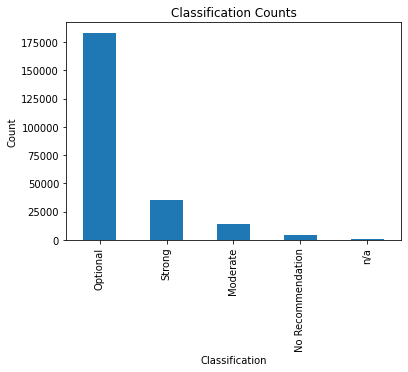

In [22]:
classification_counts = merge2['classification'].value_counts()

classification_counts.plot(kind='bar')

plt.title('Classification Counts')
plt.xlabel('Classification')
plt.ylabel('Count')

plt.show()

In [23]:
filtered_df = merge2[merge2['classification'] == 'Strong']

In [24]:
filtered_df.shape

(35364, 16)

In [25]:
unique_drugids = filtered_df['drugid'].nunique()
unique_drugids

102

In [26]:
name_drugs = filtered_df['name'].unique()

In [27]:
filtered_df.to_csv('filtered_drugs_recommendations.csv')

In [28]:
pd.DataFrame(name_drugs).to_csv("name_drugs.csv", header=None, index=None)